In [1]:
from gym_sokoban.envs import SokobanEnv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#imports from other directory
import sys, os
sys.path.insert(0, os.path.abspath('../../00_src'))
from knowledge_graph.knowledge_graph import KnowledgeGraph
del sys.path[0]

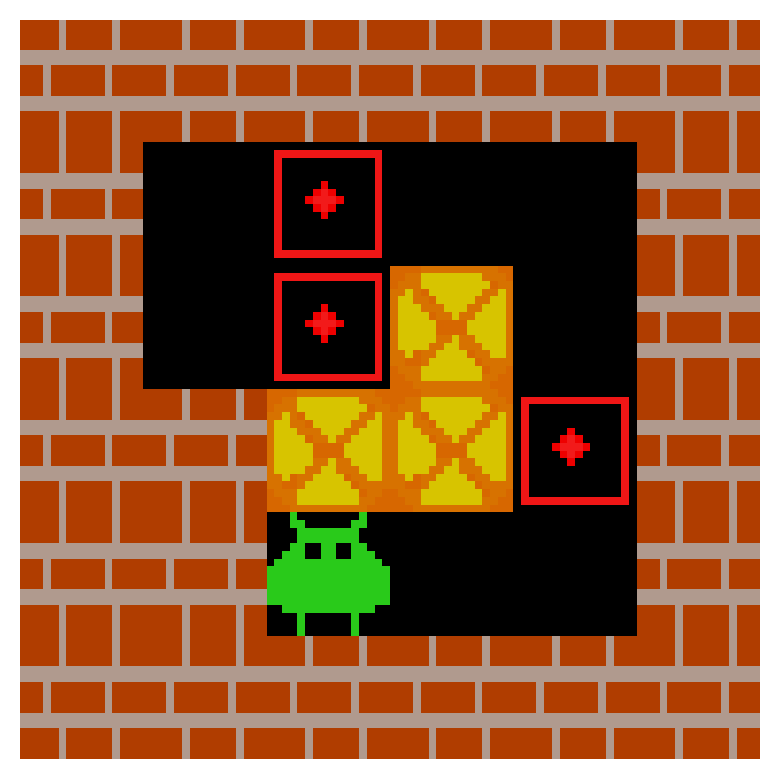

In [7]:
env = SokobanEnv(dim_room=(6, 6), max_steps=40, num_boxes=3, num_gen_steps=None, reset=True)

def render_state(env, mode="rgb_array"):
    """Renders the Sokoban environment as image and displays it."""
    image = env.render(mode)

    plt.figure(dpi=200) 
    plt.imshow(image)
    plt.axis('off')
    plt.show()

render_state(env)

In [8]:
kg = KnowledgeGraph(env)

cleared all nodes in neo4j
successful: CREATE (:Floor {id: 1, x:1, y:1, has_box_target:False, tag:"Floor [1,1]"}),(:Floor {id: 2, x:2, y:1, has_box_target:True, tag:"Floor [2,1]"}),(:Floor {id: 3, x:3, y:1, has_box_target:False, tag:"Floor [3,1]"}),(:Floor {id: 4, x:4, y:1, has_box_target:False, tag:"Floor [4,1]"}),(:Floor {id: 5, x:1, y:2, has_box_target:False, tag:"Floor [1,2]"}),(:Floor {id: 6, x:2, y:2, has_box_target:True, tag:"Floor [2,2]"}),(:Floor {id: 7, x:3, y:2, has_box_target:False, tag:"Floor [3,2]"}),(:Floor {id: 8, x:4, y:2, has_box_target:False, tag:"Floor [4,2]"}),(:Floor {id: 9, x:2, y:3, has_box_target:False, tag:"Floor [2,3]"}),(:Floor {id: 10, x:3, y:3, has_box_target:False, tag:"Floor [3,3]"}),(:Floor {id: 11, x:4, y:3, has_box_target:True, tag:"Floor [4,3]"}),(:Floor {id: 12, x:2, y:4, has_box_target:False, tag:"Floor [2,4]"}),(:Floor {id: 13, x:3, y:4, has_box_target:False, tag:"Floor [3,4]"}),(:Floor {id: 14, x:4, y:4, has_box_target:False, tag:"Floor [4,4]"});

In [9]:
UP, DOWN, LEFT, RIGHT = 1, 2, 3, 4
def doStep(step):
    env.step(step)
    render_state(env)
    kg.update()

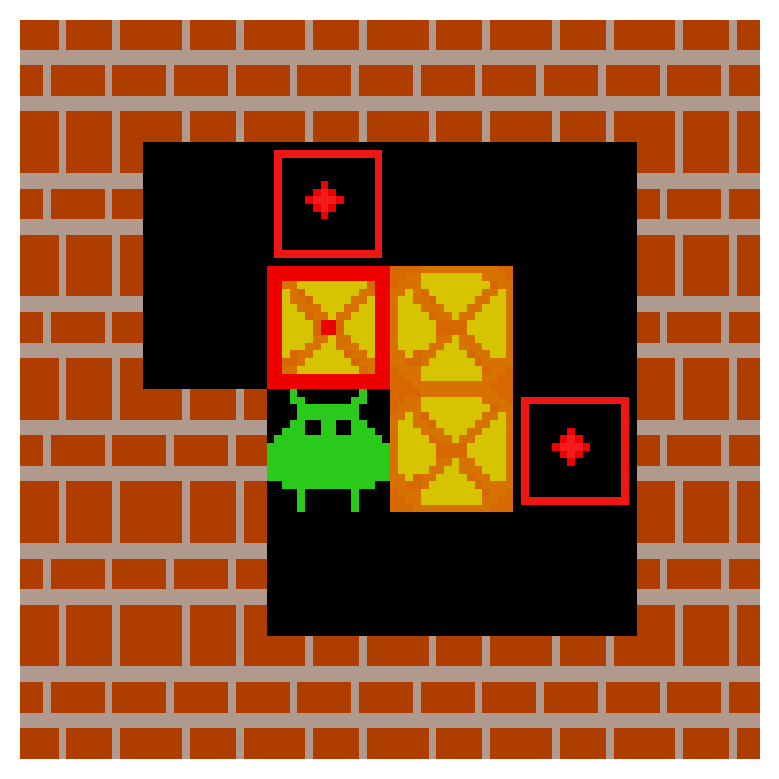

successful: MATCH () -[r:ON_TOP_OF] -> () DELETE r
successful: MATCH () -[r:CAN_MOVE] -> () DELETE r
successful: MATCH (a:Action) DELETE a
successful: MATCH (p:Player {id: 1}) SET p += {x: 2, y: 3} RETURN p
successful: MATCH (b:Box) RETURN b
successful: MATCH (b:Box {id: 2}) SET b += {x: 2, y: 2} RETURN b
successful: MATCH (p:Player),(f:Floor) WHERE p.x = f.x AND p.y = f.y CREATE (p)-[:ON_TOP_OF]->(f);
successful: MATCH (b:Box),(f:Floor) WHERE b.x = f.x AND b.y = f.y CREATE (b)-[:ON_TOP_OF]->(f);
successful: CREATE (:Action {id: 1, dx:0, dy:-1, tag:"Up"}),(:Action {id: 2, dx:0, dy:1, tag:"Down"}),(:Action {id: 4, dx:1, dy:0, tag:"Right"});
successful: MATCH (p:Player),(a:Action) CREATE (p)-[:CAN_MOVE]->(a);


In [10]:
doStep(UP)